In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
df=pd.read_csv('diabetes.csv')

In [27]:
df.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [28]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [29]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [30]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [31]:
df.shape

(768, 9)

In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
print("The Total null values in dataset are: ",df.isnull().sum().sum())

The Total null values in dataset are:  0


In [34]:
print("BP:",df['Outcome'].corr(df['BloodPressure']))
print(df['Outcome'].corr(df['Glucose']))
print(df['Outcome'].corr(df['Pregnancies']))
print(df['Outcome'].corr(df['SkinThickness']))
print(df['Outcome'].corr(df['Insulin']))
print(df['Outcome'].corr(df['BMI']))
print(df['Outcome'].corr(df['DiabetesPedigreeFunction']))
print(df['Outcome'].corr(df['Age']))

BP: 0.06506835955033273
0.4665813983068733
0.2218981530339865
0.07475223191831944
0.13054795488404788
0.29269466264444505
0.17384406565295973
0.23835598302719765


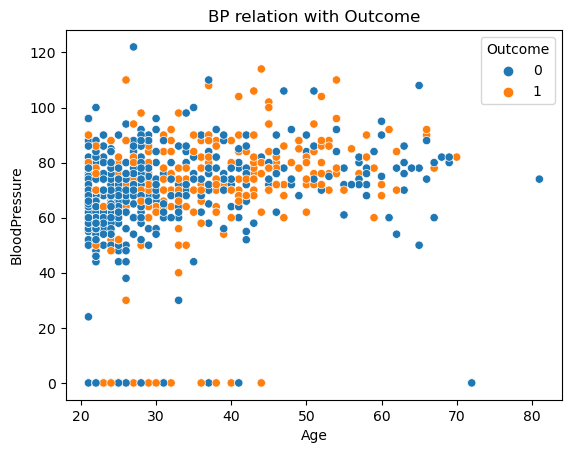

In [35]:
import matplotlib.pyplot as plt
sns.scatterplot(x='Age',y='BloodPressure',data=df,hue="Outcome")
plt.title('BP relation with Outcome')
plt.show()

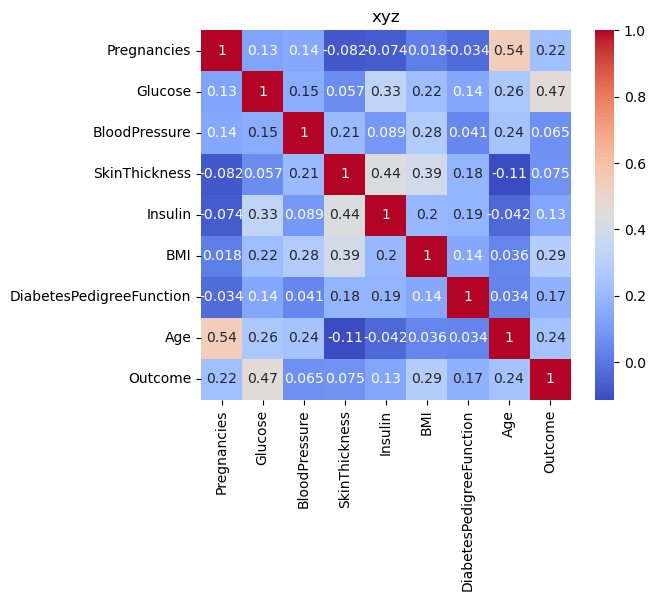

In [36]:
correlation_mat=df.corr();
sns.heatmap(correlation_mat,annot=True,square=True,cmap='coolwarm')
plt.title("xyz")
plt.show()

In [37]:
import plotly.express as px
fig=px.histogram(
    df,
    x='Age',
    marginal='box', 
    nbins=25, 
    title='Distribution of Glucose in Diabetes Dataset')
fig.update_layout(bargap=0.1)
fig.show()

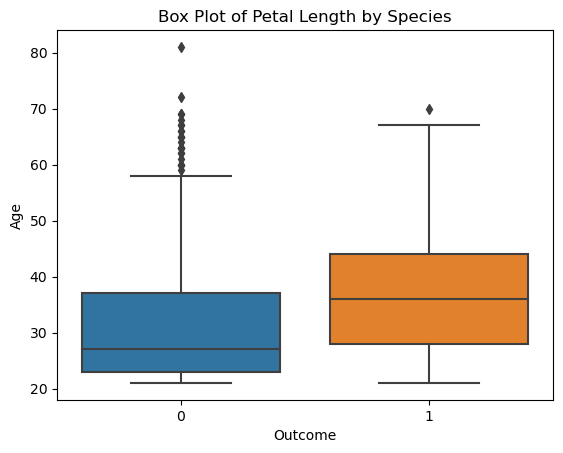

In [38]:
sns.boxplot(data=df, x='Outcome', y='Age')
plt.title('Box Plot of Petal Length by Species')
plt.show()

Coefficient (slope): [0.00701621]
Intercept: -0.4915101082697589
R-Square Error: 0.20349764653731184
Mean Squared Error: 0.1734181207722777
Root Mean Squared Error: 0.41643501386444165
Mean Absolute Error: 0.35886561583284926


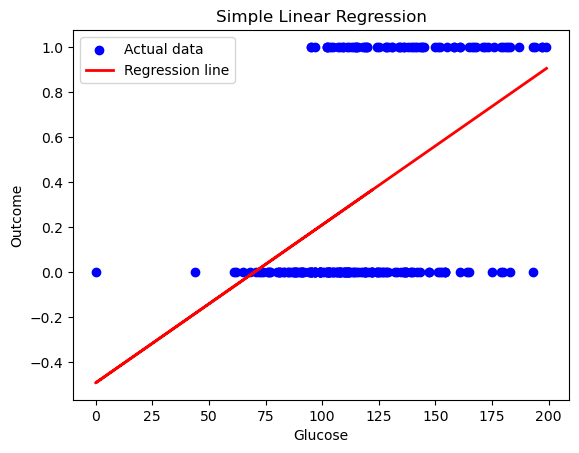

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Feature selection (consider exploring all features)
X = df[['Glucose']]  # Replace with the chosen feature(s)
y = df['Outcome']  # Assuming 'Outcome' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print("Coefficient (slope):", model.coef_)
print("Intercept:", model.intercept_)
# Model Evaluation
r_square = metrics.r2_score(Y_test,y_pred )
print(f'R-Square Error: {r_square}')
print(f'Mean Squared Error: {metrics.mean_squared_error(Y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(Y_test, y_pred))}')
print(f'Mean Absolute Error: {metrics.mean_absolute_error(Y_test, y_pred)}')

# Scatter plot of the test data
plt.scatter(X_test, y_test, color='blue', label='Actual data')

# Plot the regression line (using test data)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')

# Add titles and labels
plt.title('Simple Linear Regression')
plt.xlabel('Glucose')  # Replace with feature name(s)
plt.ylabel('Outcome')  # Replace with target variable name

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [40]:
from sklearn import metrics
result = pd.DataFrame({'Actual': Y_test, 'Predict' : y_pred})
result

,Actual,Predict
0,1,0.904715
1,0,0.259224
2,0,0.041722
3,1,0.673181
4,0,0.287289
...,...,...
226,1,0.238176
227,1,0.273257
228,0,0.175030
229,0,0.252208
